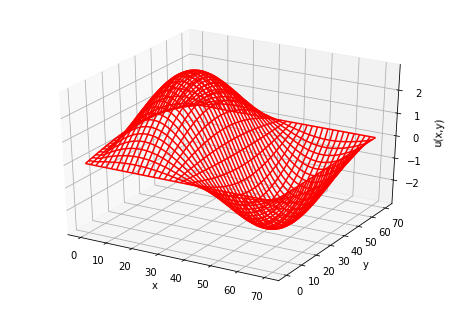

In [3]:
""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased)
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2017. 
    Please respect copyright & acknowledge our work."""

# Waves2D.py: Helmholtz eqn for rectangular membrane 
		
import matplotlib.pylab as p; from numpy import * 
from mpl_toolkits.mplot3d import Axes3D

"""Init condtns: u(x,y,t=0)=0 at borders, du/dt(x,y,t=0)=0                       
    Tension = 180 N/m^2, density = 390.0 kg/m^2 (rubber)""" 
    
tim = 30;    N = 71              
c = sqrt(180./390)            # Speed = sqrt(ten[]/den[kg/m2;])
u = zeros((N,N,N),float);      v = zeros((N,N),float)  
incrx = pi/N;              incry = pi/N                         
cprime = c;                                                     
covercp = c/cprime
ratio = 0.5*covercp*covercp            # c/c' 0.5 for stable
  
def vibration(tim):
   y = 0.0              
   for j in range(0,N):                # Initial position
      x = 0.0
      for i in range(0,N):
         u[i][j][0] = 3*sin(2.0*x)*sin(y)   # Initial shape
         x += incrx
      y += incry
     
   for j in range(1,N-1):                  # First time step
      for i in range(1,N-1):
         u[i][j][1] = u[i][j][0] + 0.5*ratio*(u[i+1][j][0]+u[i-1][j][0]
   	          + u[i][j+1][0]+u[i][j-1][0]-4.*u[i][j][0])  
  
   for k in range(1,tim):                   # Later time steps
      for j in range(1,N-1): 
         for i in range(1,N-1):
          u[i][j][2] = 2.*u[i][j][1] - u[i][j][0] + ratio*(u[i+1][j][1]  
           + u[i-1][j][1] +u[i][j+1][1]+u[i][j-1][1] - 4.*u[i][j][1])
      u[:][:][0] = u[:][:][1]                  # Reset past  
      u[:][:][1] = u[:][:][2]                   # Reset present
      for j in range(0,N):    
         for i in range(0,N):
            v[i][j] = u[i][j][2]   # Convert to 2D for matplotlib
   return v

v = vibration(tim)                             
x1 = range(0, N)
y1 = range(0, N)
X, Y = p.meshgrid(x1,y1)                          
                 
def functz(v):                                
    z = v[X,Y]; return z                     
    
Z = functz(v)
fig = p.figure()
ax = Axes3D(fig)           
ax.plot_wireframe(X, Y, Z, color = 'r')                
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')  
p.show()                                                 